
<h4> Regression Modeling</h4>


## Analysis

The Analysis contained in this file aims to predict the factors like visibility
range, temperature blocks, and day type that can 
affect the bike rentals in Chicago. By predicting how this factors affect the
bike rentals allows business to manage demand and therefore be able to allocate
properly the resources potentially.

By looking into the raw data, we can saw that each features in the data set 
have been properly identified to be affecting the rentals of bikes. With this
we have engineered the following features with their specific goals, to wit:

    1. Visibility Range - this potentially show how much visibility scores
       overall affects the consumers decision making in renting bikes;
    2. Temperature blocks - this potetially would assume that certain weather
       conditions affects consumers in renting a bike;
    3. Day Type - ultimately to assume if there is an influx in renting bikes
       between weekdays and weekends.

Conclusion:

The analysis concludes that these three factors does affect in a way the bike 
rental brand proven by the KNN model.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [223]:
## importing libraries ##

import numpy             as np                      
import pandas            as pd                       
import sklearn.linear_model                         
from sklearn.model_selection import train_test_split, GridSearchCV 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler 



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>

In [224]:
## importing data ##

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

<br>

In [225]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


<br>

In [226]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

<br>

In [227]:
# setting the response variable

y_variable = 'RENTALS'


# Part II: Data Preparation

    
<h3>Base Modeling</h3>

In [229]:
#DATA EXPLORATION

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


In [230]:
# analyzing numerical data
df_full.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.000000,2184.000000,2184.000000,2108.000000,2117.000000,2184.000000,2184.000000,2078.000000,1638.000000
mean,57.389652,59.228480,3.344780,9.646964,42.036089,0.004858,0.002015,0.547161,828.153846
std,12.861669,18.686445,2.071144,3.492413,13.997667,0.037354,0.018550,0.810564,657.599846
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,44.000000,1.800000,7.400000,33.400000,0.000000,0.000000,0.000000,241.500000
50%,57.000000,59.000000,2.900000,11.700000,41.900000,0.000000,0.000000,0.000000,761.500000
75%,68.000000,74.000000,4.500000,12.400000,51.600000,0.000000,0.000000,0.980000,1203.750000
max,91.000000,97.000000,12.800000,12.400000,75.000000,0.710000,0.300000,3.180000,3303.000000


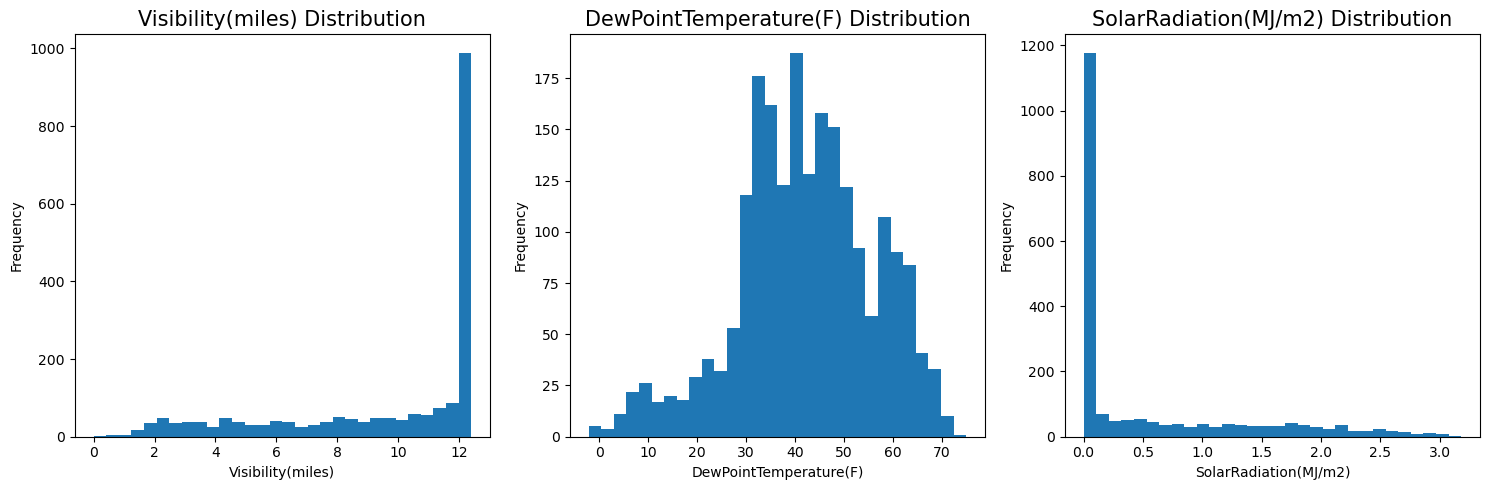

In [231]:
# after checking, it looks like there are missing values for Visibility, DewPoint, and SolarRad

#Checking distributions of columns with missing values via histogram
biking_cols = ['Visibility(miles)', 'DewPointTemperature(F)', 'SolarRadiation(MJ/m2)']

# Creating a figure
plt.figure(figsize=(15, 5))  # Adjust the size as needed

# Definining font sizes
title_fontsize = 15
label_fontsize = 10

# Using a loop to create a plot for all three
for index, column in enumerate(biking_cols, start=1): 
    plt.subplot(1, 3, index)  
    df_full[column].hist(bins= 30)
    plt.title(f'{column} Distribution', fontsize=title_fontsize)
    plt.xlabel(column, fontsize=label_fontsize)
    plt.ylabel('Frequency', fontsize=label_fontsize)
    plt.grid(False)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

# Code to make sure that plots don't overlap
plt.tight_layout()

# Displaying the plots
plt.show()

In [232]:
#before further analysis, editing column names for easier management
df_full.columns = df_full.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'Percent')

# printing comlumns again
df_full.columns

Index(['DateHour', 'TemperatureF', 'HumidityPercent', 'Wind_speed_mph', 'Visibilitymiles', 'DewPointTemperatureF', 'Rainfallin', 'Snowfallin', 'SolarRadiationMJ/m2', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

<br><h3>Missing Value Analysis and Imputation</h3>

In [233]:
## Missing Value Imputation ##

missval_bikes = df_full.isnull().sum()

missval_bikes

DateHour                  0
TemperatureF              0
HumidityPercent           0
Wind_speed_mph            0
Visibilitymiles          76
DewPointTemperatureF     67
Rainfallin                0
Snowfallin                0
SolarRadiationMJ/m2     106
Holiday                   0
FunctioningDay            0
RENTALS                 546
set                       0
dtype: int64

In [234]:
# Managing missing values

visfill = df_full['Visibilitymiles'].median()
dewfill = df_full['DewPointTemperatureF'].median()
solfill = df_full['SolarRadiationMJ/m2'].median()

df_full['Visibilitymiles'].fillna(value=visfill,
                                 inplace=True)

df_full['DewPointTemperatureF'].fillna(value=dewfill,
                                 inplace=True)

df_full['SolarRadiationMJ/m2'].fillna(value=solfill,
                                 inplace=True)

#verifying no more missing values exist
print(df_full[['Visibilitymiles', 'DewPointTemperatureF', 'SolarRadiationMJ/m2']].isnull().sum())

Visibilitymiles         0
DewPointTemperatureF    0
SolarRadiationMJ/m2     0
dtype: int64


<br><h3>Transformations</h3>

In [1]:
# Looking through the data again
df_full

NameError: name 'df_full' is not defined

In [236]:
## Transformations ##

# Transforming columns into numerical: DateHour, Holidays, and Functioning Day

# Managing DateHour
def parse_dates(date_str):
    try:
        # Code using try to parse the format '%Y-%m-%d %H:%M:%S.%f' 
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S.%f', errors='raise')
    except ValueError:
        # backup format '%Y-%m-%d %H:%M:%S'
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S', errors='raise')

    

# Applying the DateHour
df_full['DateHour'] = df_full['DateHour'].apply(parse_dates)

# Extracting 'Hour' and 'Month' from the datetime column and creating 'Day_Type'feature
df_full['Hour'] = df_full['DateHour'].dt.hour # for hours
df_full['Month'] = df_full['DateHour'].dt.month # for month
df_full['weekday'] = df_full['DateHour'].dt.weekday # weekday
df_full['Day_Type'] = df_full['weekday'].apply(lambda x: 1 if x >= 5 else 0) # weekend

# Dropping 'weekday' column since 'Day_Type' has been used
df_full.drop(['weekday'], axis=1, inplace=True) 

# Transforming 'Holiday' and 'FunctioningDay' to binary 
df_full['Holiday'] = df_full['Holiday'].map({'No': 0, 'Yes': 1})
df_full['FunctioningDay'] = df_full['FunctioningDay'].map({'No': 0, 'Yes': 1})

In [237]:
df_full

,DateHour,TemperatureF,HumidityPercent,Wind_speed_mph,Visibilitymiles,DewPointTemperatureF,Rainfallin,Snowfallin,SolarRadiationMJ/m2,Holiday,FunctioningDay,RENTALS,set,Hour,Month,Day_Type
ID,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.9,46.4,0.0,0.0,0.00,0,1,519.0,Not Kaggle,5,10,1
mb_1330,2023-10-26 08:59:53.355,51,53,2.2,11.7,35.2,0.0,0.0,1.01,0,1,1251.0,Not Kaggle,8,10,0
mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685.0,Not Kaggle,21,9,1
mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0.0,Not Kaggle,14,12,0
mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814.0,Not Kaggle,12,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mb_729,2023-10-01 07:59:56.360,67,53,3.1,2.3,46.4,0.0,0.0,0.50,0,1,NaN,Kaggle,7,10,1
mb_767,2023-10-02 21:59:56.170,50,55,3.6,12.4,32.4,0.0,0.0,0.00,0,1,NaN,Kaggle,21,10,0
mb_267,2023-09-12 01:59:58.670,45,62,0.4,12.4,34.3,0.0,0.0,0.00,0,1,NaN,Kaggle,1,9,0


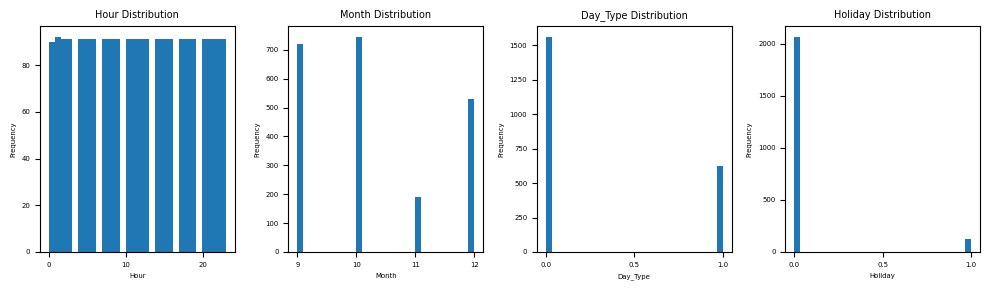

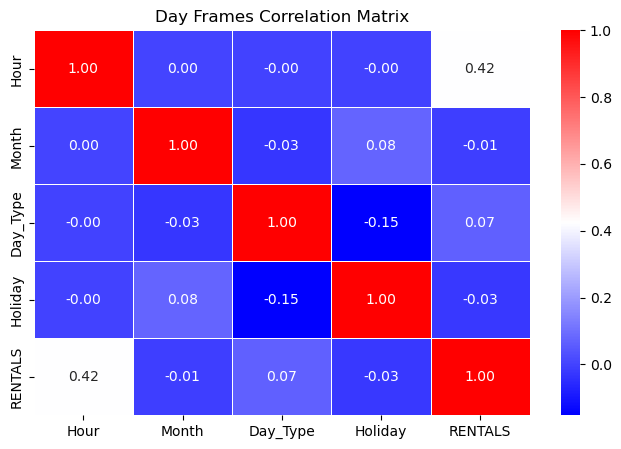

In [238]:
#Checking distribution of the different date parameters

day_frames = ['Hour','Month', 'Day_Type', 'Holiday']

# Creating a figure and a grid of subplots with a larger figsize
plt.figure(figsize=(10, 3))  

# Defining the fonts
title_sze = 7
lbl_sze   = 5

# Looping to create a subplot for each date parameters
for index, column in enumerate(day_frames, start=1):  
    plt.subplot(1, 4, index)  
    df_full[column].hist(bins= 30)
    plt.title(f'{column} Distribution', fontsize=title_sze)
    plt.xlabel(column, fontsize=lbl_sze)
    plt.ylabel('Frequency', fontsize=lbl_sze)
    plt.grid(False)
    plt.xticks(fontsize=lbl_sze)
    plt.yticks(fontsize=lbl_sze)

# Controlling the layout for the plots
plt.tight_layout()

# Displaying the plots
plt.show()


dayframes = ['Hour','Month', 'Day_Type', 'Holiday','RENTALS']
day_corr = df_full[dayframes].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(day_corr, annot=True, fmt='.2f', cmap='bwr',linewidths=.5, cbar=True)
plt.title('Day Frames Correlation Matrix')
plt.show()


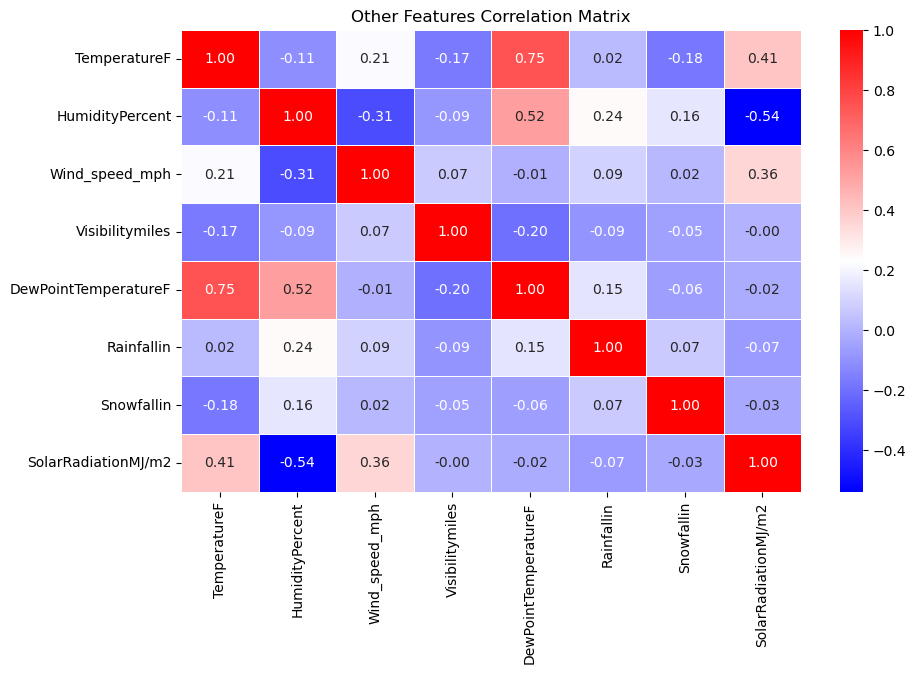

In [239]:
# Cheking distribution of the other factors

Other_factors = ['TemperatureF', 'HumidityPercent', 'Wind_speed_mph', 
                'Visibilitymiles', 'DewPointTemperatureF',  'Rainfallin', 
                'Snowfallin', 'SolarRadiationMJ/m2' ]

# Plotting the correlation matrix
corr_matrix = df_full[Other_factors].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='bwr',linewidths=.5, cbar=True)
plt.title('Other Features Correlation Matrix')
plt.show()


In [240]:
# Reviewing the data again
df_full

,DateHour,TemperatureF,HumidityPercent,Wind_speed_mph,Visibilitymiles,DewPointTemperatureF,Rainfallin,Snowfallin,SolarRadiationMJ/m2,Holiday,FunctioningDay,RENTALS,set,Hour,Month,Day_Type
ID,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.9,46.4,0.0,0.0,0.00,0,1,519.0,Not Kaggle,5,10,1
mb_1330,2023-10-26 08:59:53.355,51,53,2.2,11.7,35.2,0.0,0.0,1.01,0,1,1251.0,Not Kaggle,8,10,0
mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685.0,Not Kaggle,21,9,1
mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0.0,Not Kaggle,14,12,0
mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814.0,Not Kaggle,12,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mb_729,2023-10-01 07:59:56.360,67,53,3.1,2.3,46.4,0.0,0.0,0.50,0,1,NaN,Kaggle,7,10,1
mb_767,2023-10-02 21:59:56.170,50,55,3.6,12.4,32.4,0.0,0.0,0.00,0,1,NaN,Kaggle,21,10,0
mb_267,2023-09-12 01:59:58.670,45,62,0.4,12.4,34.3,0.0,0.0,0.00,0,1,NaN,Kaggle,1,9,0


<br><h3>Feature Engineering</h3>

In [241]:
## Feature Engineering ##

# Creating other features to include with the 'Day Type' feature


#Creating Temperature blocks in Fahrenheit Feature 
temperature_blk = [0, 40, 65, 95, 125] 
blk_labels = [0, 1, 2, 3]
df_full['Temperature_Blk'] = pd.cut(df_full['TemperatureF'], bins=temperature_blk, labels=blk_labels, include_lowest=True)

# Creating Visibility Ranges in miles Feature
visibility_rnge = [0, 5, 10, 15]
visibility_labels = [0, 1, 2]
df_full['Visibility_Ranges'] = pd.cut(df_full['Visibilitymiles'], bins=visibility_rnge, 
                                     labels=visibility_labels, include_lowest=True)


In [242]:
#Checking correlation of existing features with the y variable

corr_cols = ['RENTALS', 'Visibilitymiles', 'DewPointTemperatureF', 'FunctioningDay']

# Calculate correlation matrix for the selected columns
bike_corr_matrix = df_full[corr_cols].corr(method='pearson').round(2)

        
bike_corr_matrix.loc[ ['Visibilitymiles', 'DewPointTemperatureF', 'FunctioningDay'],
                   ['RENTALS'] ].sort_values(by = 'RENTALS',
                                                           ascending = False)

,RENTALS
FunctioningDay,0.45
DewPointTemperatureF,0.03
Visibilitymiles,-0.01


In [243]:
#Checking correlation of new features with the y variable

bike_cols = ['RENTALS', 'Day_Type', 'Temperature_Blk', 'Visibility_Ranges']

# Calculate correlation matrix for the selected columns
bikes_corr_matrix = df_full[bike_cols].corr(method='pearson').round(2)

bikes_corr_matrix.loc[ ['Day_Type', 'Temperature_Blk', 'Visibility_Ranges'],
                   ['RENTALS'] ].sort_values(by = 'RENTALS',
                                                           ascending = False)

,RENTALS
Temperature_Blk,0.28
Day_Type,0.07
Visibility_Ranges,-0.00


<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [ ]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

In [ ]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['Day_Type', 'Temperature_Blk', 'Visibility_Ranges', 'TemperatureF', 'HumidityPercent', 'Rainfallin', 'Snowfallin', 'SolarRadiationMJ/m2', 'Hour', 'Month'] # this should be a list

<br>

In [ ]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>
Develop your candidate models below.

In [ ]:
# Code for OLS Model

model_name = 'OLS' 

model = sklearn.linear_model.LinearRegression()

In [ ]:
# Code for Lasso Model

model_name = 'Lasso'

model = sklearn.linear_model.Lasso()

In [ ]:
# Code for Ridge Model

model_name = 'Ridge'

model = sklearn.linear_model.Ridge()

In [ ]:
# Code for Elastic Net Model

model_name = 'Elastic Net'

model = sklearn.linear_model.SGDRegressor()

In [ ]:
# Code for Decision Tree Model

model_name = 'Decision Tree' 

model = sklearn.tree.DecisionTreeRegressor() 

In [ ]:
# Code for KNN Model
model_name = 'KNN' # name your model

model = sklearn.neighbors.KNeighborsRegressor()

<br>

In [ ]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

In [ ]:
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name2}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

In [ ]:
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name3}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

In [ ]:
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name4}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

In [ ]:
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name5}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

In [ ]:
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name6}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

<br>
<h3>Residual Analysis</h3><br>

In [ ]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


<br>
<h3>Hyperparameter Tuning</h3><br>

In [ ]:
## Hyperparameter Tuning ##

dt_params = {'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None] }
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(x_train, y_train)
dt_best = dt_grid.best_estimator_


## Top 2 Model ##
# Ridge Regression
ridge_params = {'alpha': np.logspace(-2, 4, 70)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(x_train, y_train)
ridge_best = ridge_grid.best_estimator_

## Top 3 Model ##
# Third highest model is linear regression

# Evaluate the tuned models
tuned_models = {
    'Decision Tree (Tuned)': dt_best,
    'Linear Regression': model,
    'Ridge (Tuned)': ridge_best
}

tuned_results = []

# generate results in a loop form
for name, model in tuned_models.items():
    train_pred = model.predict(x_train) 
    test_pred = model.predict(x_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred)) # generating RSME to evaluate results better
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    gap = train_r2 - test_r2 # computing for score gap to ensure final model fall below 0.05 threshold
    tuned_results.append({'Model': name, 'Train RMSE': train_rmse, 'Test RMSE': test_rmse, 'Train R2': train_r2, 'Test R2': test_r2, 'Score Gap': gap})

# Display the results after tuning, sorted by Test RMSE
print("Parameter Tuned Model results:")
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df.sort_values(by='Test RMSE', ascending=True, inplace=True)
print(tuned_results_df)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [ ]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

<br>
<h3>Creating the Kaggle File</h3><br>

In [ ]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

<br>

In [ ]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# KNN Model
model_pred_df.to_csv(path_or_buf = "./model_output/A_1_FrancisKNN.csv",
                     index       = True,
                     index_label = 'ID')

<br>

### Referrence:

OpenAI. (2022). ChatGPT (Dec 20 version). Date Accessed: February 22, 2024. [Large language model]. https://chat.openai.com/

### Appendix:

Prompts in ChatGpt:

1. Possible features to be engineered based on the data
2. Loops for plots


<br>